In [1]:
import pandas as pd
import numpy as np

# 1. Reading excel sheets into python objects: dataframes

In [3]:
# data = pd.read_excel('data.xlsx', sheet_name=None)
data = pd.read_csv("data/medical_cost.csv")

In [ ]:
# creating a dataframe from scratch
data3 = pd.DataFrame({
    'Name': ['Ali', 'Hassan', 'Mohammad'],
    'Age': [25, 30, 35],
    'City': ['Sour', 'Saida', 'Bint jbeil']
})


# 2. Exploring dataframes

In [4]:
data.shape

(1338, 7)

In [5]:
data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.head(7)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [7]:
data.tail()

,age,gender,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
data.sample()

,age,gender,bmi,children,smoker,region,charges
60,43,male,27.36,3,no,northeast,8606.2174


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data.describe().round(2)

,age,bmi,children,charges
count,1338.00,1335.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [13]:
data.isnull().sum()

age         0
gender      0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
data['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [ ]:
data["age"].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [17]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
# access row
row2 = data.loc(1)
print(row2)
# access column

# drop column
data.drop(columns=["bmi"], axis=1, inplace=True)
data.columns

# drop row
# data.drop(1)


Index(['age', 'gender', 'children', 'smoker', 'region', 'charges'], dtype='object')

# 3. Processing/Cleaning Data

In [ ]:
# 0. Drop missing values
# 1. Fill missing (null/na/NaN) values
# 2. Renaming columns
# 3. Clean outliers or incorrect values

In [ ]:
# 0. drop missing values

data.dropna(axis=0, inplace=True) # drop all rows that has at least 1 null value
# data.dropna(axis=1) # drop all columns that has at least 1 null value

In [ ]:
# 1. Fill missing (NaN) values
data["smoker"] = data["smoker"].fillna("maybe")  # for text
data["numeric_col"] = data["numeric_col"].fillna(data["numeric_col"].mean())  # for numbers, average value
data["numeric_col"] = data["numeric_col"].fillna(data["numeric_col"].median())  # for numbers, median value
data["numeric_col"] = data["numeric_col"].fillna(data["numeric_col"].mode())  # for numbers, most frequent value

# Optional: Fill all NaNs at once
# data = data.fillna(method='ffill')   # forward fill; Filled with value from row (i-1)
# data.fillna(method="bfill")          # Uses the next valid value from below
# data = data.fillna(0)                # fill all with zero

In [ ]:
# 2. Rename columns
data = data.rename(columns={"Old Name 1": "new_name_1", "Old Name 2": "new_name_2"})

In [ ]:
# 3. Remove outliers or false data

# Example: Remove rows where 'age' is negative or unrealistically high
data = data[(data["age"] >= 0) & (data["age"] <= 100)]

# Example: Drop rows with sales over 1 million (possible data error)
data = data[data["sales"] < 1_000_000]

# Optional: Use z-score or IQR to detect statistical outliers
from scipy import stats

z_scores = stats.zscore(data["numeric_col"])
data = data[(z_scores > -3) & (z_scores < 3)]  # Keep within ±3 std dev

# 4. Visualization

📊 1. Line Plot

Purpose: Show trends over time or ordered categories (e.g., sales over months)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("sales.csv")  # contains 'Month' and 'Revenue' columns

plt.plot(df["Month"], df["Revenue"])
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()

In [ ]:
# optional styles:

print(plt.style.available)
plt.style.use("ggplot")  # Apply ggplot-like style globally

📈 2. Bar Chart


Purpose: Compare values across categories (e.g., sales by region)

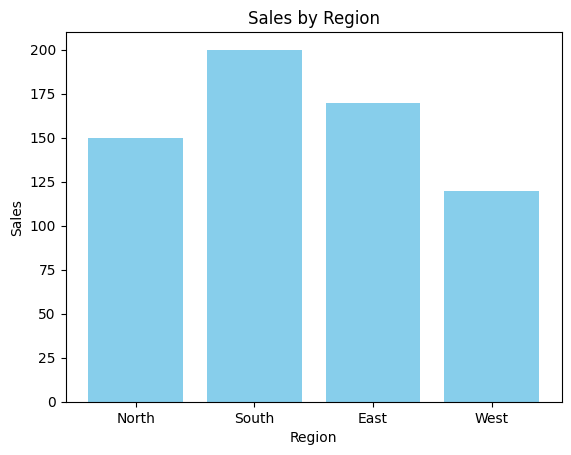

In [26]:
regions = ["North", "South", "East", "West"]
sales = [150, 200, 170, 120]

plt.bar(regions, sales, color="skyblue")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

📉 3. Histogram

Purpose: Show distribution of numerical values (e.g., age or income)


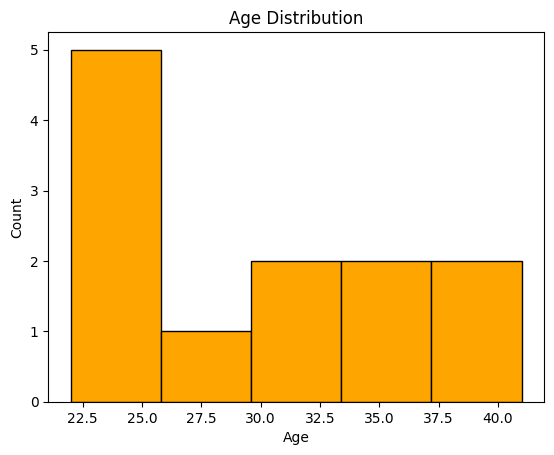

In [27]:
ages = [22, 25, 29, 31, 25, 23, 24, 35, 36, 30, 40, 41]

plt.hist(ages, bins=5, color="orange", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

🥧 4. Pie Chart

Purpose: Show proportion or percentage of categories

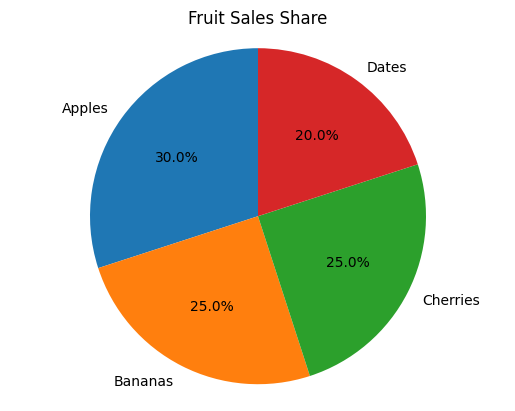

In [25]:
labels = ["Apples", "Bananas", "Cherries", "Dates"]
sizes = [30, 25, 25, 20]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Fruit Sales Share")
plt.axis("equal")  # Keep circle shape
plt.show()

🧪 5. Scatter Plot

Purpose: Visualize correlation between two numeric variables

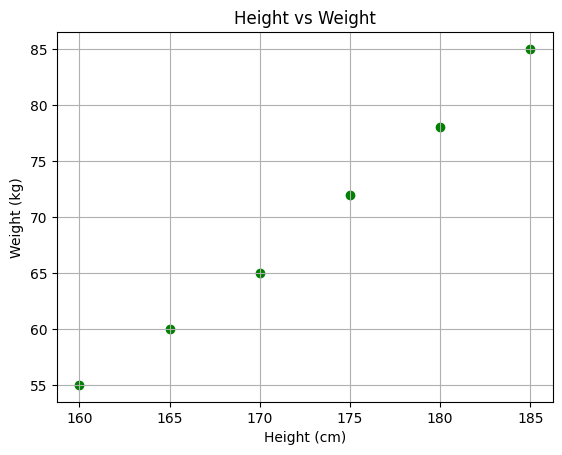

In [28]:
import numpy as np

# Example data: height vs weight
height = [160, 165, 170, 175, 180, 185]
weight = [55, 60, 65, 72, 78, 85]

plt.scatter(height, weight, color="green")
plt.title("Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()